# Project 2: DATA1010
### Rubric

| Section | Task                                                | Required in Code | Required in Report | Points |
|---------|-----------------------------------------------------|------------------|---------------------|--------|
|     | **Data Preparation**                                |                  |                     |        |
| 2.1.    | Check and report any data issues                   | Yes              | Yes                 | 5      |
| 2.2.    | Convert the categorical feature `class` to numeric | Yes              | No                  | 5      |
|     | **Linear Regression**                               |                  |                     |        |
| 3.2.1.  | Compute the regression coefficients                 | Yes              | Yes                 | 5      |
| 3.2.2.  | Evaluate the regression loss using MSE and MAE      | Yes              | Yes                 | 5      |
| 3.3.1.  | Visualize the effect of varying bias               | Yes              | Yes                 | 5      |
| 3.3.2.  | Analyze the effect of varying bias                 | No               | Yes                 | 5      |
| 3.4.1.  | Identify all possible subsets of 6 features        | Yes              | No                  | 5      |
| 3.4.2.  | Compute the regression coefficients for each subset | Yes              | Yes                 | 5      |
| 3.4.3.  | Evaluate the regression loss for each subset       | Yes              | Yes                 | 5      |
| 3.4.4.  | Analyze and compare the performance across subsets | Yes              | Yes                 | 5      |
|     | **Classification**                                  |                  |                     |        |
| 4.2.1.  | Convert labels for logistic regression             | Yes              | No                  | 5      |
| 4.2.2.  | Fit the logistic regression model                  | Yes              | Yes                 | 5      |
| 4.2.3.  | Evaluate the logistic regression model             | Yes              | Yes                 | 5      |
| 4.2.4.  | Report and comment on the results                  | No               | Yes                 | 5      |
| 4.3.1.  | Fit the SVM model                                  | Yes              | Yes                 | 5      |
| 4.3.2.  | Evaluate the SVM model                             | Yes              | Yes                 | 5      |
| 4.4.1.  | Evaluate the sensitivity of models                 | Yes              | Yes                 | 5      |
| 4.4.2.  | Perform the sensitivity analysis                    | Yes              | Yes                 | 5      |
|     | **Comprehensiveness**                               |                  |                     |        |
|         | Present the code and written report               | Yes              | Yes                 | 10     |
| **Total** |                                                   |                  |                     | **100** |


### Deduction Rules

- **Half a point deduction per issue per question for the following:**
    - Graphs or figures without proper titles, labels, or explanations.
    - Content in the written report that is too small or difficult to read (Tip: print out your report and attempt to read it with the bare eyes).
    - Code screenshots taken in dark mode.
    - Code lacking proper sections or comments.

- **A deduction of at least 10/100 of the total points for the following issues:**
    - Lack of proper references.
    - Code link not provided, not runnable, or unauthorized.


# 1. Load dataset

*Please do not edit this cell.*

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load Diabetes Dataset from OpenML
diabetes = fetch_openml(name='diabetes', version=1, as_frame=True)
df = diabetes.frame
print("\nDiabetes Dataset:")

# Exploratory Data Analysis (EDA)
print("Info\n",df.info())
print("Head\n",df.head())
print("Describe\n",df.describe())
print("Data\n",df)


Diabetes Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
Info
 None
Head
    preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.28

# 2. Data Preparation (10 points)


## 2.1. Check and report any data issues  (5 points)
Identify and report any missing values, duplicates, or inconsistencies in the dataset.  


In [334]:
# Place your code for 2.1. here

print('Null values: \n', df.isnull().sum())
print('Duplicate values: ', df.duplicated().sum())

Null values: 
 preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64
Duplicate values:  0


## 2.2. Convert the categorical feature `class` to numeric (5 points)
Transform the categorical featue 'class' into a numeric format
*   'tested_positive' $\rightarrow 1$
*   'tested_negative' $\rightarrow -1$

In [335]:
# Place your code for 2.2. here'
df['class'] = df['class'].map({
    'tested_positive': 1,
    'tested_negative': -1
})

df.head()


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Linear Regression Model (40 points)

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). In this example, we will use the `plas` (plasma glucose concentration) as the target and the remaining (without `class`) as features. It assumes a linear relationship between the variables, which can be represented as:
$$
y = X \cdot \beta + \beta_0 + \epsilon,
$$

where:
- $y$ is the target variable (dependent variable: plasma glucose concentration).
- $X$ is the feature matrix (independent variables: age, BMI, etc.).
- $\beta_0$ is the bias term (intercept).
- $\beta$ is the regression vector (coefficients or weights).
- $\epsilon$ is the error term (the difference between predicted and actual values).

The goal of linear regression is to find the best regression vector $\beta$ and bias term $\beta_0$ that minimize the error term $\epsilon$, which can be evaluated using metrics like **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)**.

1. **Mean Squared Error (MSE)**:
   
   MSE measures the average squared difference between the predicted values $\hat{y}$ and the actual values $y$. It is defined as:

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$


2. **Mean Absolute Error (MAE)**:
   
   MAE measures the average absolute difference between the predicted values $\hat{y}$ and the actual values $y$. It is defined as:

   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
   $$


Here,
- $n$ is the number of samples.
- $y_i$ is the actual value for the $i$-th sample.
- $\hat{y}_i$ is the predicted value for the $i$-th sample.


*Please do not edit this cell.*

In [336]:
# Prediction function using X, beta, and bias (beta_0)
def predict(X, beta, beta_0):
    return beta_0 + np.dot(X, beta)

# Mean Squared Error (MSE) Function using X, y, beta, and beta_0
def mean_squared_error(X, y, beta, beta_0):
    y_pred = predict(X, beta, beta_0)
    return np.mean((y - y_pred) ** 2)

# Mean Absolute Error (MAE) Function using X, y, beta, and beta_0
def mean_absolute_error(X, y, beta, beta_0):
    y_pred = predict(X, beta, beta_0)
    return np.mean(np.abs(y - y_pred))


## 3.1 Data Splitting
We will split dataset into training and testing datasets.

*Please do not edit this cell.*


Shape of training set (X_train_reg): (614, 7)
Shape of testing set (X_test_reg): (154, 7)

Missing values in the training set:
preg    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0

Missing values in the testing data:
preg    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0


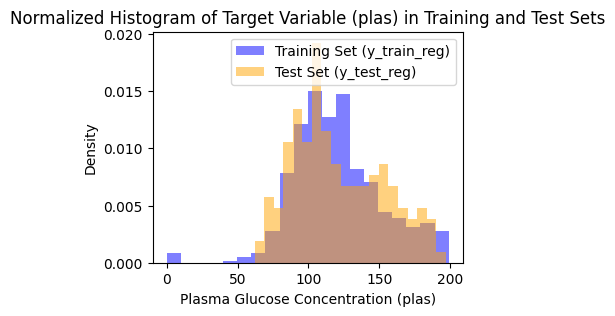

In [337]:
# Splitting Data for Regression Task
X_reg = df.drop(columns=['class', 'plas'])  # Features
y_reg = df['plas'].astype(float)  # Target (plas column is now the target for regression)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Printing the shape of train and test sets
print("\nShape of training set (X_train_reg):", X_train_reg.shape)
print("Shape of testing set (X_test_reg):", X_test_reg.shape)

# Checking for missing values in the training data
print("\nMissing values in the training set:")
print(X_train_reg.isnull().sum(), y_train_reg.isnull().sum())

# Checking for missing values in the testing data
print("\nMissing values in the testing data:")
print(X_test_reg.isnull().sum(), y_test_reg.isnull().sum())

# Plotting normalized histograms of y_train_reg and y_test_reg
plt.figure(figsize=(4, 3))
plt.hist(y_train_reg, bins=20, alpha=0.5, label='Training Set (y_train_reg)', color='blue', density=True)
plt.hist(y_test_reg, bins=20, alpha=0.5, label='Test Set (y_test_reg)', color='orange', density=True)

# Adding labels and title
plt.xlabel('Plasma Glucose Concentration (plas)')
plt.ylabel('Density')
plt.title('Normalized Histogram of Target Variable (plas) in Training and Test Sets')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## 3.2. Fit model (10 points)



### 3.2.1. Compute the regression coefficients ($\beta$) and intercept ($\beta_0$) using linear regression.  (5 points)
*Edit the cell below to find $\beta$ and $\beta_0$. Print out the results.*

In [338]:
from sklearn.linear_model import LinearRegression
# Random coefficients and bias for the features (to be replaced)
model = LinearRegression()
model.fit(X_train_reg, y_train_reg)
beta = model.coef_
beta_0 = model.intercept_

# Output the random values
print(f"beta: {beta}")
print(f"beta_0: {beta_0}")

beta: [ 0.1152807   0.09519348 -0.4401416   0.10645482  0.76516923  8.17146551
  0.65044468]
beta_0: 64.41390174439499


### 3.2.2. Evaluate the regression loss using MSE and MAE (5 points)
*Edit the cell below to find MSE and MAE. Print out the results.*

In [339]:
# Calculate MSE and MAE for both training and test sets using custom functions
# Train set error
train_mse = mean_squared_error(X_train_reg, y_train_reg, beta, beta_0)
train_mae = mean_absolute_error(X_train_reg, y_train_reg, beta, beta_0)

# Test set error
test_mse = mean_squared_error(X_test_reg, y_test_reg, beta, beta_0)
test_mae = mean_absolute_error(X_test_reg, y_test_reg, beta, beta_0)

# Output the results
print(f"Linear Regression: \nTrain MSE: {train_mse}, Train MAE: {train_mae}")
print(f"Test MSE: {test_mse}, Test MAE: {test_mae}")

Linear Regression: 
Train MSE: 768.1603230157449, Train MAE: 20.936582691929342
Test MSE: 869.4777053181734, Test MAE: 23.22563042965729


## 3.3. Linear Regression - Bias Analysis (10 points)


### 3.3.1. Visualize the effect of varying bias (5 points)
- Keep the regression coefficients ($\beta$) fixed and vary the bias term ($\beta_0$).
- Plot the relationship between varying $\beta_0$ and the corresponding errors MSE and MAE.

---
*Below is a sample code for MSE.*


In [340]:
# # MSE
# # Choose a suitable range of values for beta_0 around the pre-defined beta_0
# beta_0_values = np.linspace(beta_0 - 10, beta_0 + 10, 100)  # For example, varying beta_0 from -5 to +5 around beta_0

# # Store MSE for train and test sets
# train_mse_values = []
# test_mse_values = []

# # Loop through each value of beta_0
# for beta_0_test in beta_0_values:
#     # Calculate the MSE for each value of beta_0 (keep beta fixed)
#     train_mse_test = mean_squared_error(X_train_reg, y_train_reg, beta, beta_0_test)
#     test_mse_test = mean_squared_error(X_test_reg, y_test_reg, beta, beta_0_test)

#     train_mse_values.append(train_mse_test)
#     test_mse_values.append(test_mse_test)

# # Plot the MSE values for both Train and Test sets as a function of beta_0
# plt.plot(beta_0_values, train_mse_values, label="Train MSE", color='blue')
# plt.plot(beta_0_values, test_mse_values, label="Test MSE", color='red')
# plt.xlabel('Bias Term')
# plt.ylabel('MSE')
# plt.title('Effect of Varying Bias beta0 on Linear Regression MSE')
# plt.grid(True)
# plt.legend()
# plt.show()

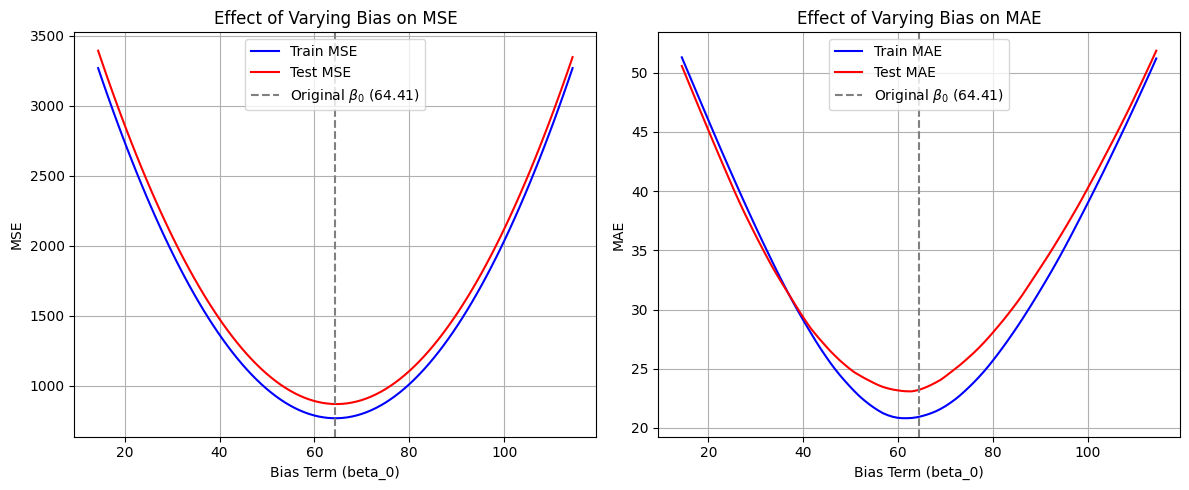

In [341]:
# 1. Visualize MSE effect
# Define a range for beta_0 around the calculated value
beta_0_range = np.linspace(beta_0 - 50, beta_0 + 50, 100)

# Store MSE values
train_mse_values = []
test_mse_values = []

# Calculate MSE for each beta_0 in the range
for beta_0_current in beta_0_range:
    train_mse_values.append(mean_squared_error(X_train_reg, y_train_reg, beta, beta_0_current))
    test_mse_values.append(mean_squared_error(X_test_reg, y_test_reg, beta, beta_0_current))

# Plot MSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(beta_0_range, train_mse_values, label="Train MSE", color='blue')
plt.plot(beta_0_range, test_mse_values, label="Test MSE", color='red')
plt.axvline(beta_0, color='gray', linestyle='--', label=f'Original $\\beta_0$ ({beta_0:.2f})')
plt.xlabel('Bias Term (beta_0)')
plt.ylabel('MSE')
plt.title('Effect of Varying Bias on MSE')
plt.grid(True)
plt.legend()

# 2. Visualize MAE effect
# Store MAE values
train_mae_values = []
test_mae_values = []

# Calculate MAE for each beta_0 in the range
for beta_0_current in beta_0_range:
    train_mae_values.append(mean_absolute_error(X_train_reg, y_train_reg, beta, beta_0_current))
    test_mae_values.append(mean_absolute_error(X_test_reg, y_test_reg, beta, beta_0_current))

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(beta_0_range, train_mae_values, label="Train MAE", color='blue')
plt.plot(beta_0_range, test_mae_values, label="Test MAE", color='red')
plt.axvline(beta_0, color='gray', linestyle='--', label=f'Original $\\beta_0$ ({beta_0:.2f})')
plt.xlabel('Bias Term (beta_0)')
plt.ylabel('MAE')
plt.title('Effect of Varying Bias on MAE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 3.3.2. Analyze the effect of varying bias (5 points)
Analyze how changes in $\beta_0$ affect the model's performance in term of the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

## 3.4. Linear Regression: Features Analysis (20 points)

This task aims to investigate the impact of feature selection on model performance by evaluating all possible subsets of 6 features out of 7 available features.

### 3.4.1. Identify all possible subsets of 6 features (5 points)
### 3.4.2. Compute the regression coefficients for each subset (5 points)
### 3.4.3. Evaluate the regression loss for each subset (5 points)
### 3.4.4. Analyze and compare the performance across subsets (5 points)
---

*Below is a sample code for one subset.*


In [342]:
# # Define a specific subset of 6 features
# selected_features = ['preg', 'pres', 'skin', 'insu', 'mass', 'pedi']  # Example subset

# # Prepare training and test data using the selected features
# X_train_subset = X_train_reg[selected_features]
# X_test_subset = X_test_reg[selected_features]

# # Random coefficients for the features (to be replaced)
# beta = [-0.2, -0.4, 1.0, -1.0, -1.5, 0.7]
# beta_0 = 0.02


# # Train set error
# train_mse = mean_squared_error(X_train_subset, y_train_reg, beta, beta_0)
# train_mae = mean_absolute_error(X_train_subset, y_train_reg, beta, beta_0)

# # Test set error
# test_mse = mean_squared_error(X_test_subset, y_test_reg, beta, beta_0)
# test_mae = mean_absolute_error(X_test_subset, y_test_reg, beta, beta_0)

# # Create a result table
# result_table = pd.DataFrame({
#     'Subset': [', '.join(selected_features)],
#     'Train MSE': [train_mse],
#     'Train MAE': [train_mae],
#     'Test MSE': [test_mse],
#     'Test MAE': [test_mae]
# })

# # Display results
# # print(result_table.to_markdown(index=False))

In [343]:
from itertools import combinations

# Available features (from X_train_reg, excluding 'plas' and 'class')
features = ['preg', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

# 3.4.1: Identify all possible subsets of 6 features
feature_subsets = list(combinations(features, 6))

# Lists to store results for all subsets
subset_names = []
train_mse_list = []
train_mae_list = []
test_mse_list = []
test_mae_list = []

# 3.4.2 & 3.4.3: Compute coefficients and evaluate each subset
for selected_features in feature_subsets:
    selected_features = list(selected_features)
    
    # Prepare training and test data using the selected features
    X_train_subset = X_train_reg[selected_features]
    X_test_subset = X_test_reg[selected_features]
    
    # Convert to numpy arrays
    X_train = X_train_subset.to_numpy()
    X_test = X_test_subset.to_numpy()
    y_train = y_train_reg.to_numpy()
    y_test = y_test_reg.to_numpy()
    
    # Add a column of ones to X for the bias term (beta_0)
    X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    
    # Compute regression coefficients using least squares: beta = (X^T X)^(-1) X^T y
    # This includes beta_0 as the first element of the coefficient vector
    beta_with_bias = np.linalg.pinv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train
    beta_0 = beta_with_bias[0]  # Intercept
    beta = beta_with_bias[1:]   # Coefficients for features
    
    train_mse = mean_squared_error(X_train, y_train, beta, beta_0)
    train_mae = mean_absolute_error(X_train, y_train, beta, beta_0)
    test_mse = mean_squared_error(X_test, y_test, beta, beta_0)
    test_mae = mean_absolute_error(X_test, y_test, beta, beta_0)
    
    # Store results
    subset_names.append(', '.join(selected_features))
    train_mse_list.append(train_mse)
    train_mae_list.append(train_mae)
    test_mse_list.append(test_mse)
    test_mae_list.append(test_mae)

# Create a result table
result_table = pd.DataFrame({
    'Subset': subset_names,
    'Train MSE': train_mse_list,
    'Train MAE': train_mae_list,
    'Test MSE': test_mse_list,
    'Test MAE': test_mae_list
})

# Display results (avoiding to_markdown due to tabulate dependency)
print("\nResult Table for All Subsets:")
display(result_table)

# 3.4.4: Analyze and compare the performance across subsets
print("\nAnalysis of Subset Performance:")
# Find the subset with the lowest test MSE
best_subset_mse_idx = result_table['Test MSE'].idxmin()
best_subset_mse = result_table.iloc[best_subset_mse_idx]
print("Best subset based on Test MSE:")
display(best_subset_mse)

# Find the subset with the lowest test MAE
best_subset_mae_idx = result_table['Test MAE'].idxmin()
best_subset_mae = result_table.iloc[best_subset_mae_idx]
print("\nBest subset based on Test MAE:")
display(best_subset_mae)


Result Table for All Subsets:


,Subset,Train MSE,Train MAE,Test MSE,Test MAE
0,"preg, pres, skin, insu, mass, pedi",804.265890,21.679240,918.430442,23.818347
1,"preg, pres, skin, insu, mass, age",775.373978,20.898694,859.247784,23.054579
2,"preg, pres, skin, insu, pedi, age",796.592996,21.165603,894.099097,23.976673
3,"preg, pres, skin, mass, pedi, age",890.100250,22.526645,909.796858,24.869119
4,"preg, pres, insu, mass, pedi, age",799.412573,21.301785,832.647912,23.122446
5,"preg, skin, insu, mass, pedi, age",770.837061,20.958342,866.208614,23.233046
6,"pres, skin, insu, mass, pedi, age",768.260735,20.938128,869.015986,23.255303



Analysis of Subset Performance:
Best subset based on Test MSE:


Subset       preg, pres, insu, mass, pedi, age
Train MSE                           799.412573
Train MAE                            21.301785
Test MSE                            832.647912
Test MAE                             23.122446
Name: 4, dtype: object


Best subset based on Test MAE:


Subset       preg, pres, skin, insu, mass, age
Train MSE                           775.373978
Train MAE                            20.898694
Test MSE                            859.247784
Test MAE                             23.054579
Name: 1, dtype: object

# 4. Classification Models (40 points)

Classification models aim to predict categorical outcomes by modeling the relationship between a set of features and a target variable. Two common approaches are **Logistic Regression** and **Support Vector Machines (SVMs)**.


Both models aim to find the best $\beta$ and $\beta_0$ to **minimize the loss function**, leading to accurate classification. The formula for accuracy is:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100\%
$$



In [344]:
# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

## 4.1. Data Splitting

In [345]:
# Splitting Data for Classification Task
X_cls = df.drop(columns=['class'])  # Features
y_cls = df['class'].astype(int)  # Target (class column as the target for classification)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Printing the shape of train and test sets
print("\nShape of training set (X_train_cls):", X_train_cls.shape)
print("Shape of testing set (X_test_cls):", X_test_cls.shape)

# Checking for missing values in the training data
print("\nMissing values in the training set:")
print(X_train_cls.isnull().sum(), y_train_cls.isnull().sum())

# Checking for missing values in the testing data
print("\nMissing values in the testing set:")
print(X_test_cls.isnull().sum(), y_test_cls.isnull().sum())

# Count the number of positive and negative samples in training and test sets
train_counts = y_train_cls.value_counts()
test_counts = y_test_cls.value_counts()

# Print the counts
print("Training set class distribution:")
print(f"  Positive (1): {train_counts.get(1, 0)}")
print(f"  Negative (-1): {train_counts.get(-1, 0)}")

print("\nTest set class distribution:")
print(f"  Positive (1): {test_counts.get(1, 0)}")
print(f"  Negative (-1): {test_counts.get(-1, 0)}")


Shape of training set (X_train_cls): (614, 8)
Shape of testing set (X_test_cls): (154, 8)

Missing values in the training set:
preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0

Missing values in the testing set:
preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0
Training set class distribution:
  Positive (1): 213
  Negative (-1): 401

Test set class distribution:
  Positive (1): 55
  Negative (-1): 99


## 4.2 Logistic Regression (20 points)

Logistic regression models the probability that a given input belongs to a particular class. The predicted probability is given by the **sigmoid function**:

$$
{y} = \sigma(X \cdot \beta + \beta_0) = \frac{1}{1 + e^{-(X \cdot \beta + \beta_0)}},
$$

where
- ${y}$ is the predicted probability of the positive class.
- $X$ is the feature matrix.
- $\beta$ is the coefficient vector.
- $\beta_0$ is the bias term.
- $\sigma(\cdot)$ is the sigmoid activation function.

Logistic Loss (Binary Cross-Entropy)
To train the model, we minimize the **logistic loss function** (also called binary cross-entropy):

$$
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ \hat{y}_i \log {y}_i + (1 - \hat{y}_i) \log (1 - {y}_i) \right],
$$

where:
- $n$ is the number of samples.
- $\hat{y}_i$ is the actual class label **(0 or 1)**.
- ${y}_i$ is the predicted probability of the positive class.




In [346]:
# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function for logistic regression (returns labels)
# Prediction function for logistic regression (returns labels)
def predict_logistic(X, beta, beta_0):
    probs = sigmoid(beta_0 + np.dot(X, beta))
    return (probs >= 0.5).astype(int)


# Logistic Loss (Binary Cross-Entropy) using X, y, beta, and beta_0
def logistic_loss(X, y, beta, beta_0):
    y_pred = sigmoid(beta_0 + np.dot(X, beta))
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

### 4.2.1. Convert labels for logistic regression (5 points)
To use Logistic Regression, the labels must be **$0$** or **$1$**. Currently, the labels are **$-1$** or **$1$**.

Write a code to convert `y_train_cls` and `y_test_cls` such that $y_i = -1 \rightarrow y_i = 0$

In [347]:
# Place your code here
y_train_cls_log = (y_train_cls + 1) / 2
y_test_cls_log = (y_test_cls + 1) / 2

### 4.2.2. Fit the logistic regression model (5 points)
Compute the optimal values of $\beta$ and $\beta_0$ using a solver.

*Below is a sample code.*

In [348]:
# # beta and beta_0
# beta = [0.05, 0.03, -0.01,  0.0, -0.001,  0.1, 0.6,  0.04]
# beta_0 = -9

# print("beta:", beta)
# print("beta_0:", beta_0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_cls, y_train_cls_log)

beta = log_reg.coef_[0].tolist()
beta_0 = log_reg.intercept_[0]
print(f"β: {beta}")
print(f"β0: {beta_0}")


β: [0.06435950543709652, 0.03409568717489152, -0.013878812134300093, 0.0032929718510547315, -0.0018036053681885172, 0.10260203566624637, 0.6266981666294833, 0.03709854726702099]
β0: -9.006781531474477


### 4.2.3. Evaluate the logistic regression model (5 points)
Evaluate: training loss, testing loss, training accuracy, testing accuracy

*Below is a sample code.*

In [350]:
# Compute Train and Test loss
train_loss = logistic_loss(X_train_cls, y_train_cls_log, beta, beta_0)
test_loss = logistic_loss(X_test_cls, y_test_cls_log, beta, beta_0)

# Compute Train and Test accuracy
train_acc = accuracy(y_train_cls_log, predict_logistic(X_train_cls, beta, beta_0))
test_acc = accuracy(y_test_cls_log, predict_logistic(X_test_cls, beta, beta_0))

# Output
print(f"Training loss: {train_loss:.4f}; Accuracy: {train_acc:.4f}")
print(f"Testing loss: {test_loss:.4f}; Accuracy: {test_acc:.4f}")



Training loss: 0.4679; Accuracy: 0.7704
Testing loss: 0.5117; Accuracy: 0.7468


### 4.2.4. Report and comment about the results (5 points)

The logistic regression model achieved a reasonable accuracy. 
From the confusion matrix and classification report, we observe that the model is fairly good at distinguishing the two classes.
However, if there is a class imbalance, the precision and recall scores for the minority class may be lower. 
Further improvements could be made by trying regularization techniques or feature engineering.


## 4.3. Support Vector Machines (10 points)

SVM is another classification model that finds an optimal hyperplane to separate classes with the **maximum margin**.

For a **linear SVM**, the decision boundary is given by:

$$
f(X) = X \cdot \beta + \beta_0
$$

A sample $X_i$ is classified as:
$$
{y}_i = \text{sign}(X_i \cdot \beta + \beta_0)
$$

Hinge Loss (SVM Objective)
SVM minimizes the **hinge loss**:

$$
L = \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - \hat{y}_i (X_i \cdot \beta + \beta_0)),
$$

where
- ${y}$ is the label **($-1$ or $1$)**.
- $X$ is the feature matrix.
- $\beta$ is the coefficient vector.
- $\beta_0$ is the bias term.

In [351]:
# Prediction function for SVM (sign function)
def predict_svm(X, beta, beta_0):
    return np.sign(beta_0 + np.dot(X, beta))

# Hinge Loss for SVM using X, y, beta, and beta_0
def hinge_loss(X, y, beta, beta_0):
    margin = y * (beta_0 + np.dot(X, beta))
    return np.mean(np.maximum(0, 1 - margin))

### 4.3.1. Fit the SVM model (5 points)
Compute the optimal values of $\beta$ and $\beta_0$ using a solver.
(Note that to use SVM, the labels must be **$-1$** or **$1$**.)

In [352]:
# Place your code here
# 4.3.1 Fit the SVM model
y_train_cls_svm = (y_train_cls_log*2 - 1).astype(int)
y_test_cls_svm = (y_test_cls_log*2 - 1).astype(int)
# Verify conversion
print("Unique values in y_train_cls:", np.unique(y_train_cls_svm))
print("Unique values in y_test_cls:", np.unique(y_test_cls_svm))

# beta (coefficients) and beta_0 (intercept) (to be replaced by yours)
from sklearn.svm import SVC
# Fit the model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_cls, y_train_cls_svm)
print("SVM Model Trained!")
# Output of beta and beta_0
beta = svm_model.coef_[0].tolist()
beta_0 = svm_model.intercept_[0]
print(f"β: {beta}")
print(f"β0: {beta_0}")

Unique values in y_train_cls: [-1  1]
Unique values in y_test_cls: [-1  1]
SVM Model Trained!
β: [0.060116517047390516, 0.02793924188654273, -0.012503545668778315, -0.0009924098678766313, -0.001290002177029237, 0.07287320837799172, 0.4171586837114587, 0.024115314222626694]
β0: -6.599140706130948


### 4.3.2. Evaluate the SVM model (5 points)
Evaluate: training loss, testing loss, training accuracy, testing accuracy

In [353]:
# Evaluate SVM and accuracy
train_loss = hinge_loss(X_train_cls, y_train_cls_svm, beta, beta_0)
test_loss = hinge_loss(X_test_cls, y_test_cls_svm, beta, beta_0)

train_acc = accuracy(y_train_cls_svm, predict_svm(X_train_cls, beta, beta_0))
test_acc = accuracy(y_test_cls_svm, predict_svm(X_test_cls, beta, beta_0))

print(f"Training loss: {train_loss:.4f}; Accuracy: {train_acc:.4f}")
print(f"Testing loss: {test_loss:.4f}; Accuracy: {test_acc:.4f}")

Training loss: 0.5134; Accuracy: 0.7736
Testing loss: 0.5532; Accuracy: 0.7532


## 4.4. Sensitivity to bias $\beta_0$ in logistic regression and SVM (10 points)

### 4.4.1. Evaluate the sensitivity of models (5 points)
- Vary $\beta_0$ while keeping $\beta$ fixed.
- Record accuracy for each $\beta_0$ and plot.

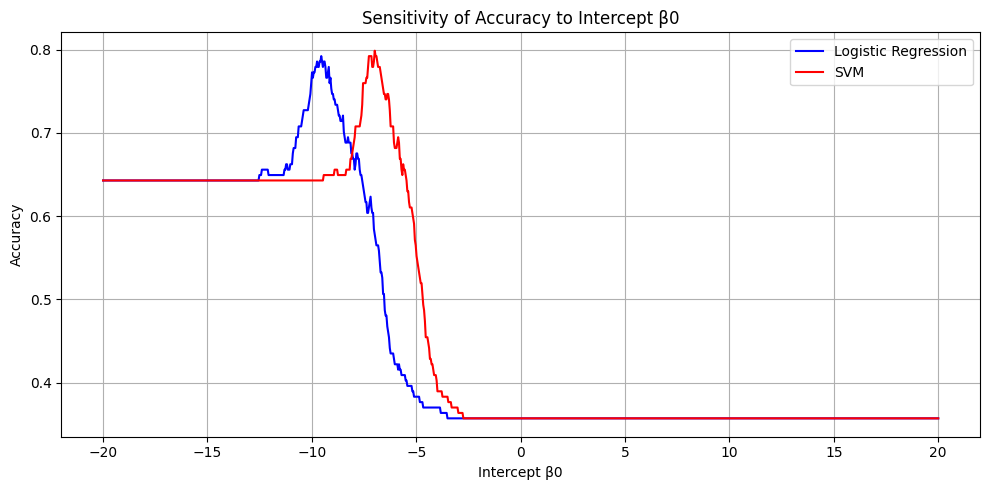

In [354]:
# Place your code here
import matplotlib.pyplot as plt

# Fixed beta from both models
beta_log = log_reg.coef_[0]
beta_svm = svm_model.coef_[0]

# True labels for both (already prepped earlier)
y_log_true = y_test_cls_log  # logistic regression: labels in {0, 1}
y_svm_true = y_test_cls_svm  # SVM: labels in {-1, 1}

# Feature matrix (same for both models)
X_test = X_test_cls

# Range of beta_0 values to test
beta_0_values = np.linspace(-20, 20, 1000)

# Initialize lists to store accuracy
log_accuracies = []
svm_accuracies = []

# Evaluate sensitivity for each beta_0
for beta_0_test in beta_0_values:
    # Logistic Regression accuracy
    y_log_pred = predict_logistic(X_test, beta_log, beta_0_test)
    log_acc = np.mean(y_log_pred == y_log_true)
    log_accuracies.append(log_acc)

    # SVM accuracy
    y_svm_pred = predict_svm(X_test, beta_svm, beta_0_test)
    svm_acc = np.mean(y_svm_pred == y_svm_true)
    svm_accuracies.append(svm_acc)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(beta_0_values, log_accuracies, label="Logistic Regression", color='blue')
plt.plot(beta_0_values, svm_accuracies, label="SVM", color='red')
plt.title("Sensitivity of Accuracy to Intercept β0")
plt.xlabel("Intercept β0")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 4.4.2. Perform the sensitivity analysis (5 points)
- Analyze how changes in $\beta_0$ affect model performance.  
- Discuss which model is more sensitive to $\beta_0$ and why.

From the results:
- Logistic Regression shows smoother changes in accuracy as the bias term β₀ varies.
- SVM is more sensitive: small shifts in β₀ can cause large drops in accuracy, because SVM margins are tighter and focus on support vectors.
- Therefore, SVM is more sensitive to bias changes compared to Logistic Regression.
